# Interpolation of data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [10]:
def expTaylor(x, x0, nmax):
#     x: Argument
#     x0: Point around the expansion
#     nmax: number of sums
    t = 0
    for i in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**i / np.math.factorial(i)
    return t

In [14]:
exp_taylor = expTaylor(1, 0, 10)
print(f"e^1: {np.e**1}\n\n taylor expansion around x0 = 0 of e^x at x = 1: {exp_taylor}\n\n error: {abs(np.e**1-exp_taylor)}")

e^1: 2.718281828459045

 taylor expansion of e^x at z = 1: 2.7182818011463845

 error: 2.7312660577649694e-08


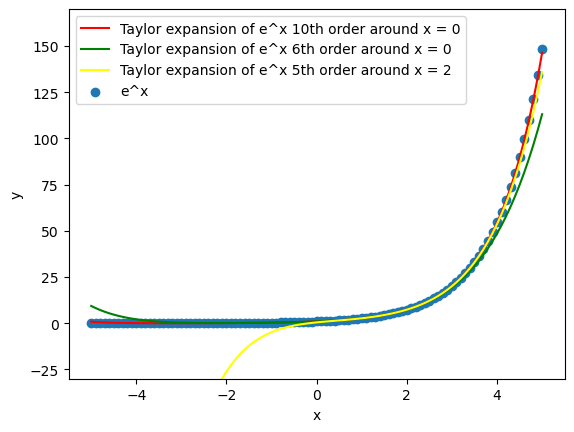

In [43]:
x = np.linspace(-5, 5, 101)
y1 = np.e**x
y2 = expTaylor(x, 0, 10)
y3 = expTaylor(x, 0, 6)
y4 = expTaylor(x, 2, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-30,170])
plt.plot(x, y2,color='red',label ="Taylor expansion of e^x 10th order around x = 0" )
plt.plot(x, y3,color='green',label ="Taylor expansion of e^x 6th order around x = 0" )
plt.plot(x, y4,color='yellow',label ="Taylor expansion of e^x 5th order around x = 2" )
plt.scatter(x, y1, label = "e^x")
plt.legend()

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [54]:
def sinTaylor(x, nmax):
#     x: Argument
#     nmax: number of sums
    t = 0
    for i in range(nmax+1):
        t = t + (-1)**i * x**(2*i+1) / np.math.factorial(2*i+1)
    return t

- Accuracy of \\( \sin(10.5) \\)

In [76]:
sin_taylor = sinTaylor(10.5, 10)
print(f"sin(10.5): {np.sin(10.5)}\n\n taylor expansion around x0 = 0 of sin(x) at x = 10.5: {sin_taylor}\n\n error: {abs(np.sin(10.5)-sin_taylor)}")

sin(10.5): -0.87969575997167

 taylor expansion around x0 = 0 of sin(x) at x = 10.5: 9.119622235844645

 error: 9.999317995816314


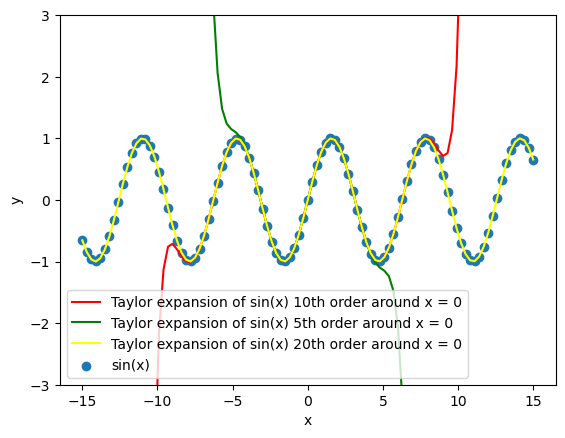

In [79]:
x = np.linspace(-15, 15, 101)
y1 = np.sin(x)
y2 = sinTaylor(x, 10)
y3 = sinTaylor(x, 5)
y4 = sinTaylor(x, 20)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-3,3])
plt.plot(x, y2,color='red',label ="Taylor expansion of sin(x) 10th order around x = 0" )
plt.plot(x, y3,color='green',label ="Taylor expansion of sin(x) 5th order around x = 0" )
plt.plot(x, y4,color='yellow',label ="Taylor expansion of sin(x) 20th order around x = 0" )
plt.scatter(x, y1, label = "sin(x)")
plt.legend(loc = "lower left")

### 1.3 Implementation of a general function

Derivative (more details in separate section): \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

## 2. Interpolation

### 2.1 Generate data points

Modify x and y values by adding random numbers

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

In [2]:
from scipy import interpolate

- linear splines

- zoom

- cubic spline

### 2.2.2 Perturbed data

- How to handle data which is not smooth?

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

### 2.3.4 Loop for the actual fitting

- Comparison of a and a0